### Title : Develop an PET classification model using CNN.

#### Description : From the Dataset provided containing pictures of pets, the students are required to make a successful Pet Recognition System classifying pets according to their category. The students are also required to use Augmentation features to flip the image into different transformations using standard methods and classify again to see the performance difference.

#### Objective: Familiarity with creating suitable architecture of CNN and compare the classifier results after performing Image Augmentations.

##### Domain : Computer Vision.

Steps to be taken:

1) Decide architecture of  CNN for the said task.

2) Create working code using Keras and Tensorflow to perform the operation using both  CNN.

3) Compare the results post augmentation.

### Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [2]:
import os
import glob

In [3]:
import PIL
import matplotlib.image as mpimg

In [4]:
import cv2
import random

### Specifying folder directory for training images

In [5]:
train_folder = r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\catsndogs\data\train'

In [6]:
file = random.choice(os.listdir(train_folder))
image_path= os.path.join(train_folder, file)
img=cv2.imread(image_path)

In [7]:
type(img)

NoneType

In [8]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder= r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\catsndogs\data\train'


##### Creating Dataset while resizing the images using open-cv library and also creating the labels

In [9]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
X, y =create_dataset(r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\catsndogs\data\train')

In [10]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder_test = r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\catsndogs\data\test'

##### Same operation for test folder images

In [11]:
def create_dataset1(img_folder_test):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder_test):
        for file in os.listdir(os.path.join(img_folder_test, dir1)):
       
            image_path= os.path.join(img_folder_test, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
X_test, y_test =create_dataset1(r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\catsndogs\data\test')


In [12]:
type(X[0])

numpy.ndarray

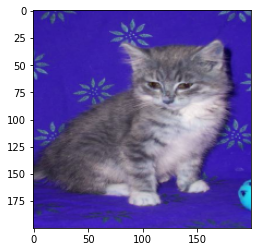

In [13]:
plt.imshow(X[34])

##### Converting lists into numpy array

In [14]:
X = np.array(X)
y = np.array(y)

##### Using label encoder for standardizing and labelling cat = 0 and dog = 1

In [15]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
y = le.fit_transform(y)
le = LabelEncoder()
for i in y:
    y = le.fit_transform(y)

##### Function defined to plot image with label as well 

In [16]:
def plt_show(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [17]:
classes = ["cats", "dogs"]

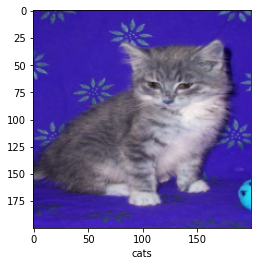

In [18]:
plt_show(X,y,34)

In [19]:
X = np.array(X)
y = np.array(y)
len(X)

1642

In [20]:
len(y)

1642

In [21]:
len(X)

1642

In [22]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

####  Creating a CNN model with 3 Conv2D layer, a Fully Connected layer while using relu as an activation function
#### We use loss function as binary crossentropy since we have only two objects to detect.

In [23]:
cnn=models.Sequential([
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(200,200,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),  
                       layers.Flatten(),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(1,activation='sigmoid')])

In [24]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
cnn.fit(X,y,epochs=10)

Epoch 1/10
52/52 [==============================] - 181s 3s/step - loss: 1.0081 - accuracy: 0.5042
Epoch 2/10
52/52 [==============================] - 186s 4s/step - loss: 0.6870 - accuracy: 0.5332
Epoch 3/10
52/52 [==============================] - 186s 4s/step - loss: 0.6433 - accuracy: 0.6059
Epoch 4/10
52/52 [==============================] - 186s 4s/step - loss: 0.6249 - accuracy: 0.6567
Epoch 5/10
52/52 [==============================] - 187s 4s/step - loss: 0.5168 - accuracy: 0.7475
Epoch 6/10
52/52 [==============================] - 187s 4s/step - loss: 0.4268 - accuracy: 0.8143
Epoch 7/10
52/52 [==============================] - 187s 4s/step - loss: 0.2629 - accuracy: 0.8871
Epoch 8/10
52/52 [==============================] - 187s 4s/step - loss: 0.1634 - accuracy: 0.9371
Epoch 9/10
52/52 [==============================] - 188s 4s/step - loss: 0.0907 - accuracy: 0.9762
Epoch 10/10
52/52 [==============================] - 189s 4s/step - loss: 0.0497 - accuracy: 0.9827


In [27]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [28]:
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)


#### Using label encoder for standardizing and labelling cat = 0 and dog = 1 for test dataset as well

In [29]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
y_test = le.fit_transform(y_test)
le = LabelEncoder()
for i in y:
    y_test = le.fit_transform(y_test)

In [30]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

#### We get an accuracy score of 1.00 after evaluating 

In [31]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 1s 715ms/step - loss: 0.0027 - accuracy: 1.0000


[0.0027171785477548838, 1.0]

#### Now we will try data augmentation on the dataset

#### We have used just one augmetation method since the other methods led to low accuracy 

In [42]:
data_augmentation = models.Sequential([
    
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
])

#### Creating a CNN model and adding the augmentation layer as well

In [43]:
cnn=models.Sequential([
                       data_augmentation,
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(200,200,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),  
                       layers.Flatten(),
                       layers.Dense(128,activation='relu'),
                       layers.Dense(1,activation='sigmoid')])

In [44]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
cnn.fit(X,y,epochs = 5)

Epoch 1/5
52/52 [==============================] - 193s 4s/step - loss: 0.9846 - accuracy: 0.4961
Epoch 2/5
52/52 [==============================] - 207s 4s/step - loss: 0.6892 - accuracy: 0.5222
Epoch 3/5
52/52 [==============================] - 220s 4s/step - loss: 0.6635 - accuracy: 0.5822
Epoch 4/5
52/52 [==============================] - 197s 4s/step - loss: 0.6256 - accuracy: 0.6487
Epoch 5/5
52/52 [==============================] - 192s 4s/step - loss: 0.6224 - accuracy: 0.6637


#### After the evaluation we get an accuracy of 0.80 

In [46]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 1s 988ms/step - loss: 0.5373 - accuracy: 0.8000


[0.5372516512870789, 0.800000011920929]

### Comparision 
#### In the normal CNN model we achieve a maximum accuracy of 1.0 while we get 0.80 points accuracy after augmentation which is not bad but less than the normal model.

#### Reason for this: It is not necessary that after augmentation the accuracy always increases, if the normal model is able to provide a higher accuracy, the model after augmentation will augment the images much more which is not necessary since the normal model is able to figure out the necessary filters in the dataset.